In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

from profi.camera.socks_behaviours import ColorCirclesSocks
from profi.camera.tracking_behaviour import YellowRobotTracking
from profi.camera.mapping_behavour import ColorMapping

In [3]:
def imshow(image, figsize=(10,8)):
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=figsize)
    plt.imshow(image)
    plt.show()

In [6]:
images_path = "/home/quetalasj/profi/profi2022_robotics/workspace"

In [9]:

# free_map = 1 - np.clip(cv2.imread(f'{images_path}/frame-image.png', cv2.IMREAD_GRAYSCALE), 0, 1)
# plt.figure(figsize=(10,8))
# plt.imshow(free_map)
# plt.colorbar()
# plt.show()

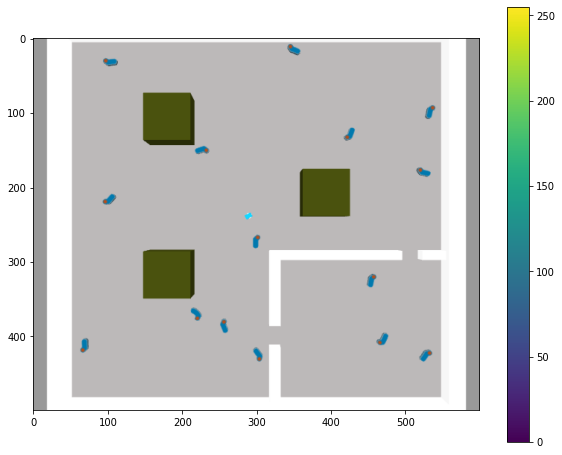

In [51]:

cv_image = cv2.imread(f'{images_path}/frame-image.png')
plt.figure(figsize=(10,8))
plt.imshow(cv_image)
plt.colorbar()
plt.show()

In [52]:
socks_behaviour = ColorCirclesSocks()
robot_tracking_behaviour = YellowRobotTracking()
mapping_behaviour = ColorMapping()

In [53]:
socks_centers, socks_contours, mask_socks_centers, socks_stats, num_socks, socks_labels \
                = socks_behaviour.detect(cv_image)

In [54]:
sockn = 1
goal_point = int(round(socks_centers[sockn][0])), int(round(socks_centers[sockn][1])), int(round(0))
print(goal_point)
print(socks_centers)

(97, 30, 0)
[[345.          11.        ]
 [ 97.1         30.05      ]
 [536.          93.35294118]
 [421.11111111 132.72222222]
 [232.28571429 150.5       ]
 [519.5        177.        ]
 [ 96.5        219.5       ]
 [301.         267.5       ]
 [457.         320.5       ]
 [220.         376.5       ]
 [255.77777778 380.94444444]
 [465.23529412 408.94117647]
 [ 66.35294118 419.        ]
 [531.88888889 422.83333333]
 [303.5        431.        ]]


In [55]:
sock_label = 1 + np.argmin(np.abs(socks_centers - np.array([goal_point[0], goal_point[1]])), axis=0)[0]
sock_label

2

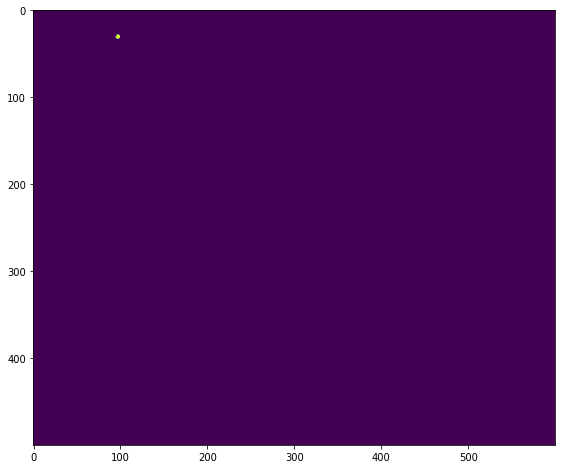

In [57]:
imshow(mask_socks_centers)

In [60]:
start_point = (291, 241, 0)

In [61]:
socks_centers

array([[345.        ,  11.        ],
       [ 97.1       ,  30.05      ],
       [536.        ,  93.35294118],
       [421.11111111, 132.72222222],
       [232.28571429, 150.5       ],
       [519.5       , 177.        ],
       [ 96.5       , 219.5       ],
       [301.        , 267.5       ],
       [457.        , 320.5       ],
       [220.        , 376.5       ],
       [255.77777778, 380.94444444],
       [465.23529412, 408.94117647],
       [ 66.35294118, 419.        ],
       [531.88888889, 422.83333333],
       [303.5       , 431.        ]])

In [157]:
import numpy as np
def angle_difference(angle1, angle2):
    delta_angle = angle1 - angle2
    return (delta_angle + np.pi) % (2 * np.pi) - np.pi

import numpy as np
def angle_difference2(angle1, angle2):
    delta_angle = angle1 - angle2
    delta_angle = (delta_angle + 180) % 360 - 180
    return delta_angle

In [223]:
angles_r = np.arange(0, 2, 0.25) * np.pi
print(angles_r)

angles_g = np.arange(0, 2, 0.25) * np.pi
print(angles_g)

[0.         0.78539816 1.57079633 2.35619449 3.14159265 3.92699082
 4.71238898 5.49778714]
[0.         0.78539816 1.57079633 2.35619449 3.14159265 3.92699082
 4.71238898 5.49778714]


In [282]:
1/2 - 3/2

-1.0

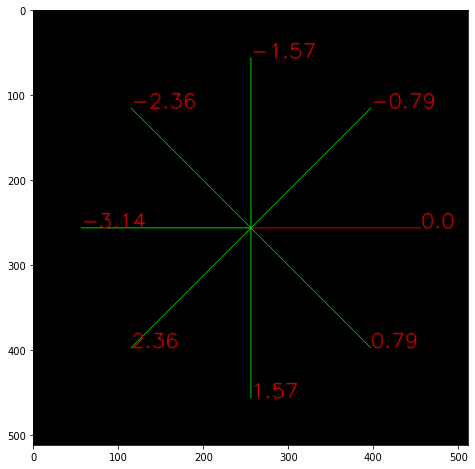

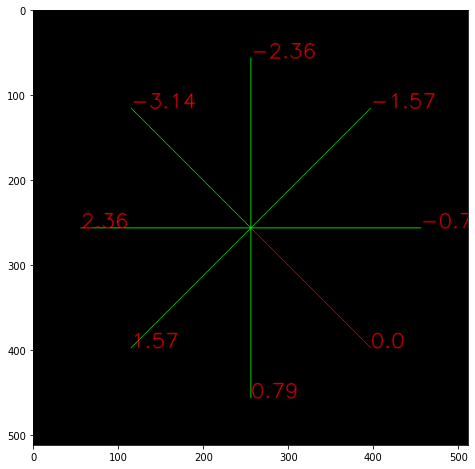

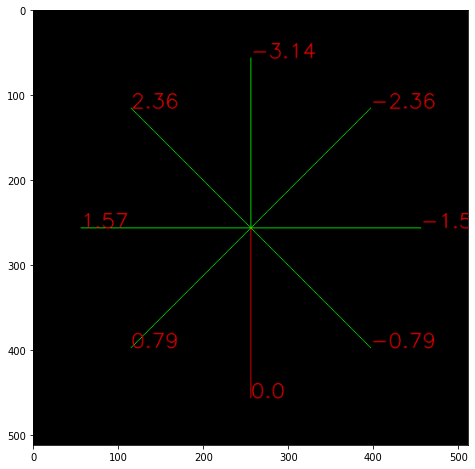

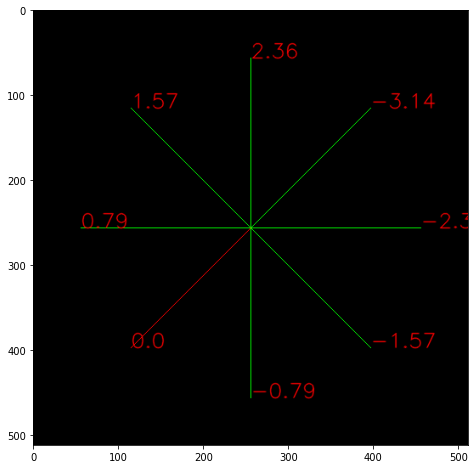

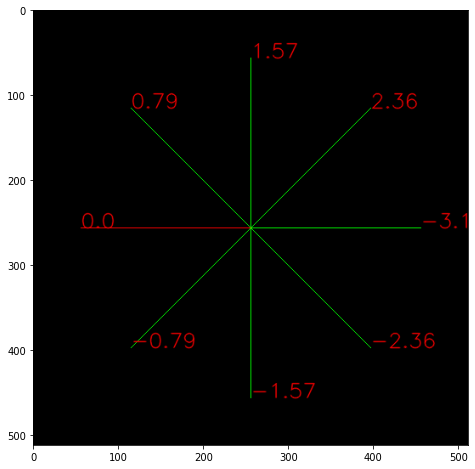

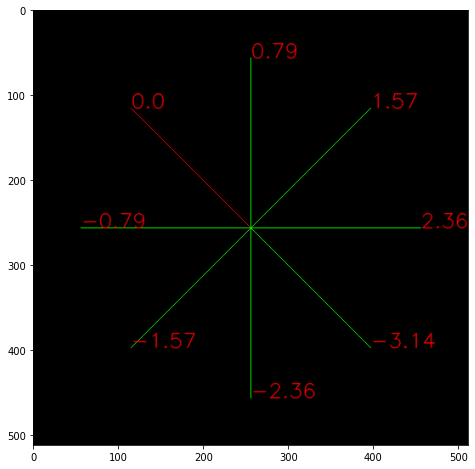

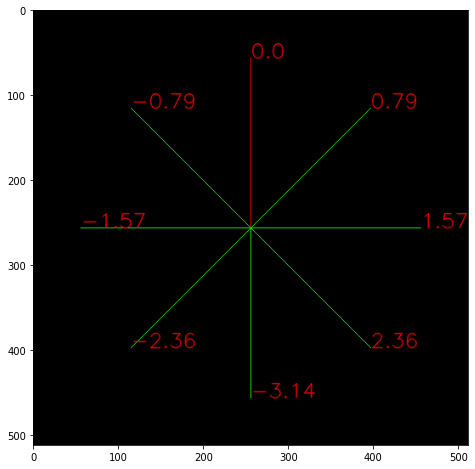

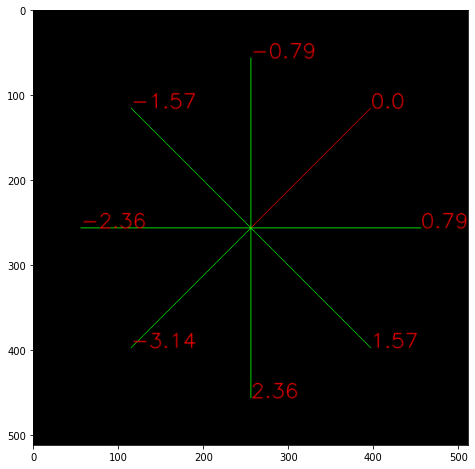

In [284]:
from profi.controllers.visual_controller import VisualController

vc = VisualController()

# font
font = cv2.FONT_HERSHEY_SIMPLEX

fontScale = 0.8
   
for r in angles_r:

    image = np.zeros((512, 512, 3), dtype=np.uint8)

    for g in angles_g:
        x = round(200 * np.cos(g))
        y = round(200 * np.sin(g))
        image = cv2.line(image, (256, 256), (256 + x, 256 + y), (0, 255, 0), 1)

        diff = round(vc.angle_difference_rad(g, r),2)
        # print(diff)

        image = cv2.putText(image, str(diff), (256+x, 256+y), font, fontScale,
                     (255,0,0), 1, cv2.LINE_AA, False)

    x = round(200 * np.cos(r))
    y = round(200 * np.sin(r))
    image = cv2.line(image, (256, 256), (256 + x, 256 + y), (255, 0, 0), 1)

    imshow(image)

In [236]:
x

5.0